In [274]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [275]:
df_dir = os.path.join(os.getcwd(), 'data', 'social_data.xlsx')
df = pd.read_excel(df_dir)
df

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0.0,0.0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0.0,0.0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0.0,0.0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0.0,0.0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video
...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0.0,0.0,Link
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0.0,0.0,Link
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0.0,0.0,Link
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116.0,42.0,Text


# DQR and Exploration

In [276]:
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Published Date,3479,3407,2023-03-30 09:00:21,6,2023-01-01 14:59:04,2023-03-31 19:55:43.192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account,3479,6,General,2271,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account Type,3479,6,TWITTER,1951,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Campaign Name,3479,4,N/A,1485,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Impressions,3479.0,NaN,NaN,NaN,NaT,NaT,10972.453579,29577.108063,0.0,167.0,1884.0,12467.0,753227.0
Total Engagements,3479.0,NaN,NaN,NaN,NaT,NaT,947.390629,3468.628038,0.0,0.0,39.0,276.5,95062.0
Media Type,3479,7,Photo,1490,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Published Date     3479 non-null   datetime64[ns]
 1   Account            3479 non-null   object        
 2   Account Type       3479 non-null   object        
 3   Campaign Name      3479 non-null   object        
 4   Total Impressions  3479 non-null   float64       
 5   Total Engagements  3479 non-null   float64       
 6   Media Type         3479 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 190.4+ KB


In [278]:
numerics = ['Published Date', 'Total Impressions', 'Total Engagements']
categoricals = ['Account', 'Account Type', 'Campaign Name', 'Media Type']

In [279]:
statistics_of_data_numerics = []
for col in numerics:
    statistics_of_data_numerics.append((col,
                             'numeric',
                             df[col].notnull().sum(),
                             f'{df[col].notnull().sum()/df.shape[0]*100}%',
                             len(df[df[col] == 0]),
                             df[col].min(),
                             df[col].max(),
                             df[col].mode()[0]
                             ))

stats_df_numerics = pd.DataFrame(statistics_of_data_numerics, columns=['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','Min', 'Max','Most Common',])
stats_df_numerics

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Most Common
0,Published Date,numeric,3479,100.0%,0,2023-01-01 14:59:04,2023-03-31 19:55:43.192000,2023-03-30 09:00:21
1,Total Impressions,numeric,3479,100.0%,744,0.0,753227.0,0.0
2,Total Engagements,numeric,3479,100.0%,966,0.0,95062.0,0.0


In [280]:
statistics_of_data_cats = []
for col in categoricals:
    statistics_of_data_cats.append((col,
                             'categorical',
                             df[col].notnull().sum(),
                             f'{df[col].notnull().sum()/df.shape[0]*100}%',
                             len(df[df[col] == 0]),
                             df[col].nunique(),
                             df[col].mode()[0]
                            
                             ))
stats_df_cats = pd.DataFrame(statistics_of_data_cats, columns=['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_df_cats

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,Account,categorical,3479,100.0%,0,6,General
1,Account Type,categorical,3479,100.0%,0,6,TWITTER
2,Campaign Name,categorical,3479,100.0%,0,4,N/A
3,Media Type,categorical,3479,100.0%,0,7,Photo


In [281]:
df.columns

Index(['Published Date', 'Account', 'Account Type', 'Campaign Name',
       'Total Impressions', 'Total Engagements', 'Media Type'],
      dtype='object')

In [282]:
plt.rcParams.update({'figure.figsize':(12,6)})
plt.rcParams.update({'font.size':20})

## Account

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'General '),
  Text(1, 0, 'DOTA2'),
  Text(2, 0, 'CSGO'),
  Text(3, 0, 'Valorant'),
  Text(4, 0, 'Content Creators'),
  Text(5, 0, 'General')])

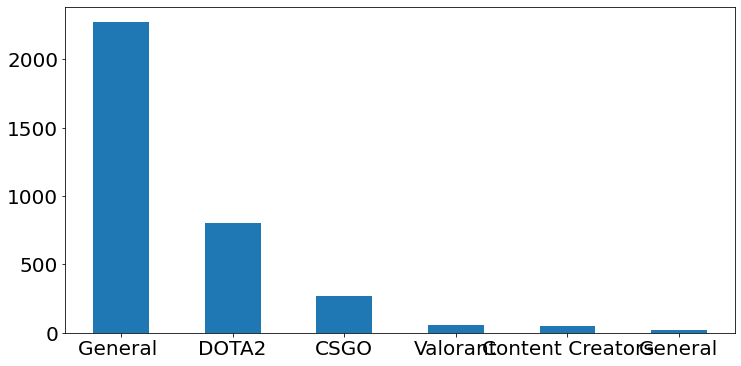

In [283]:
df['Account'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

## Account Type

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'TWITTER'),
  Text(1, 0, 'INSTAGRAM'),
  Text(2, 0, 'FBPAGE'),
  Text(3, 0, 'YOUTUBE'),
  Text(4, 0, 'TIKTOK_BUSINESS'),
  Text(5, 0, 'LINKEDIN_COMPANY')])

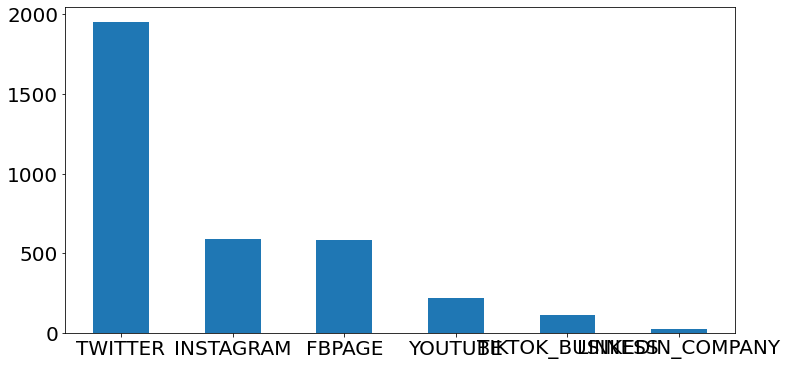

In [284]:
df['Account Type'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

## Campaign Name

(array([0, 1, 2, 3]),
 [Text(0, 0, 'N/A '),
  Text(1, 0, 'Community Engagement '),
  Text(2, 0, 'Evil Exhibited '),
  Text(3, 0, 'Evergreen ')])

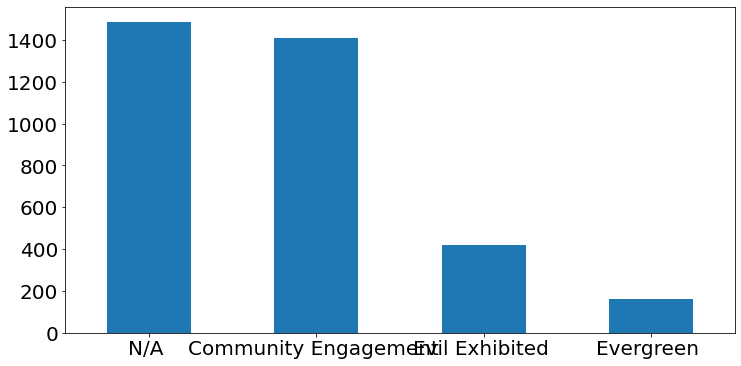

In [285]:
df['Campaign Name'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

## Total Impressions

<AxesSubplot:>

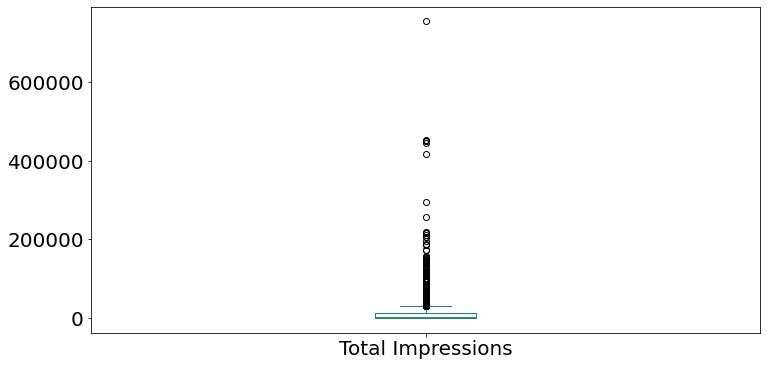

In [286]:
df['Total Impressions'].plot(kind='box')

## Total Engagements

<AxesSubplot:>

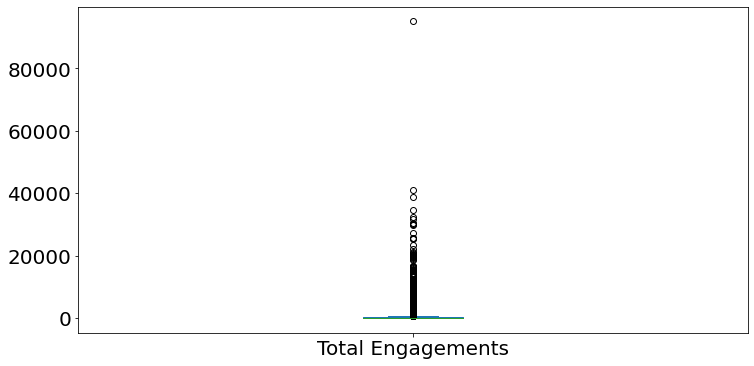

In [287]:
df['Total Engagements'].plot(kind='box')

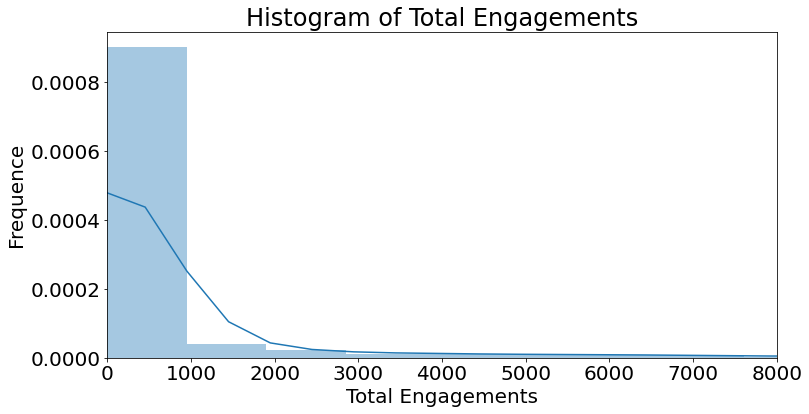

In [288]:
sns.distplot(df['Total Engagements'],bins=100, kde=True)
plt.xlim([0,8000])
plt.xlabel('Total Engagements')
plt.ylabel('Frequence')
plt.title('Histogram of ' + 'Total Engagements')
plt.show()

## Media Type

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Photo'),
  Text(1, 0, 'Video'),
  Text(2, 0, 'Text'),
  Text(3, 0, 'Link'),
  Text(4, 0, 'Carousel'),
  Text(5, 0, 'Mixed'),
  Text(6, 0, 'Album')])

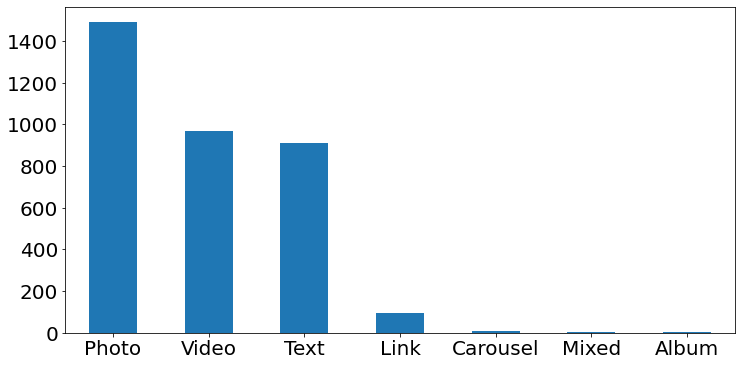

In [289]:
df['Media Type'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)

# Data Cleaning

In [290]:
df['Account'] = df['Account'].replace('General ', 'General', regex=True)
df['Campaign Name'] = df['Campaign Name'].replace('N/A', np.nan, regex=True)
df['Engagement Rate'] = df['Total Engagements'] / df['Total Impressions']

# Analytical Questions

## What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?

Because the dataset has unverfied extreme values and is skewed, the median value of Engagement Rate, which is 3.08%, is chosen to represent the typical engagement rate we can expect. The likelihood that we can achieve a 15% engagement rate is 8.19%.

In [291]:
df['Engagement Rate'].dropna().sort_values()

2761      0.000000
1887      0.000000
3298      0.000000
1888      0.000000
2808      0.000000
           ...    
2361      0.600000
1586      1.000000
3216      8.800000
3457     12.586667
837     940.000000
Name: Engagement Rate, Length: 2735, dtype: float64

In [292]:
df[df['Engagement Rate'] >= 1]

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
837,2023-03-10 12:37:06,General,FBPAGE,NaN,1.0,940.0,Photo,940.000000
1586,2023-02-23 06:18:27,General,FBPAGE,NaN,1.0,1.0,Photo,1.000000
3216,2023-01-19 06:02:34,General,FBPAGE,NaN,5.0,44.0,Photo,8.800000
3457,2023-01-05 11:55:44,General,FBPAGE,NaN,300.0,3776.0,Photo,12.586667


As the result shows, there are 4 records where the engagement rate is greater than 1, and these records should be examined manually to ensure the data is actually correct. For now, since the value 940 and 12.58 are way too large and not logically reasonable, we drop these two records and assume the other two are correct.

In [293]:
df = df[df['Engagement Rate'] < 12]

<AxesSubplot:xlabel='Engagement Rate', ylabel='Density'>

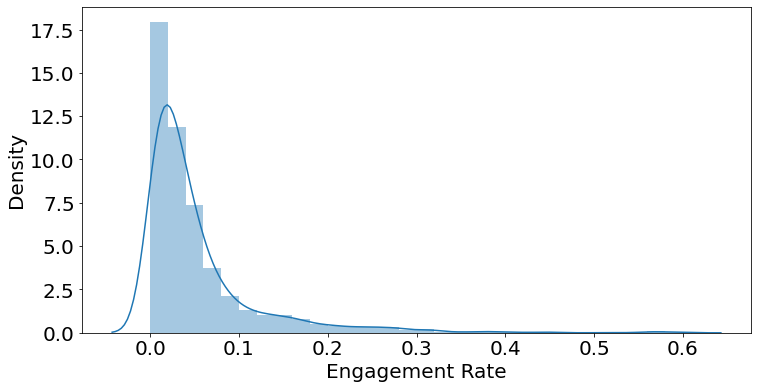

In [294]:
sns.distplot( df[df['Engagement Rate'] < 1]['Engagement Rate'], bins=30, kde=True)

In [295]:
df['Engagement Rate'].median()

0.03082459708965733

Because we are unsure about the data quality, and there are extreme values, here we use the median value of Engagement Rate, which is 3.08%, to represent the typical engagement rate we can expect.

In [296]:
len(df[df['Engagement Rate'] > 0.15]) / len(df['Engagement Rate'].dropna())

0.08196121478229053

From the historical data, the probability that we can achieve a 15% engagement rate is 8.19%.

## Does day of the week and time of posting affect engagement rates?

Yes, day of the week and time of posting do affect engagement rates.

To check if day of the week affect engagement rates, I first transform the dataset and add two columns: day_of_week with 0 denoting Monday and 6 denoting Sunday, and time_of_day with early morning denoting hours between 0 and 6, morning denoting hours between 6 to 12, afternoon denoting hours between 12 and 18, and night denoting hours between 18 and 24. 

I then plot a boxplot for different day of week excluding the extreme values. As it is not easy to tell if day of the week really affects engagement rates from the boxplot, I try to conduct statistical testing. After I conduct the shapiro test, I find that the data does not follow a normal distribution, and thus I conduct kruskal-wallis test for the two variables. The result shows that day of the week and time of posting do affect engagement rate.

In [297]:
df['day_of_week'] = df['Published Date'].dt.weekday

def time_transform(x):
    if 0 < x <= 6:
        return 'early morning'
    elif 6 < x <= 12:
        return 'morning'
    elif 12 < x <= 18:
        return 'afternoon'
    return 'night'

df['time_of_day'] = df['Published Date'].dt.hour.apply(time_transform)
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,day_of_week,time_of_day
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,0.127666,4,night
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882.0,83.0,Photo,0.044102,4,night
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892.0,3076.0,Video,0.171920,4,night
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874.0,1447.0,Video,0.104296,4,afternoon
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692.0,8044.0,Photo,0.213414,4,afternoon


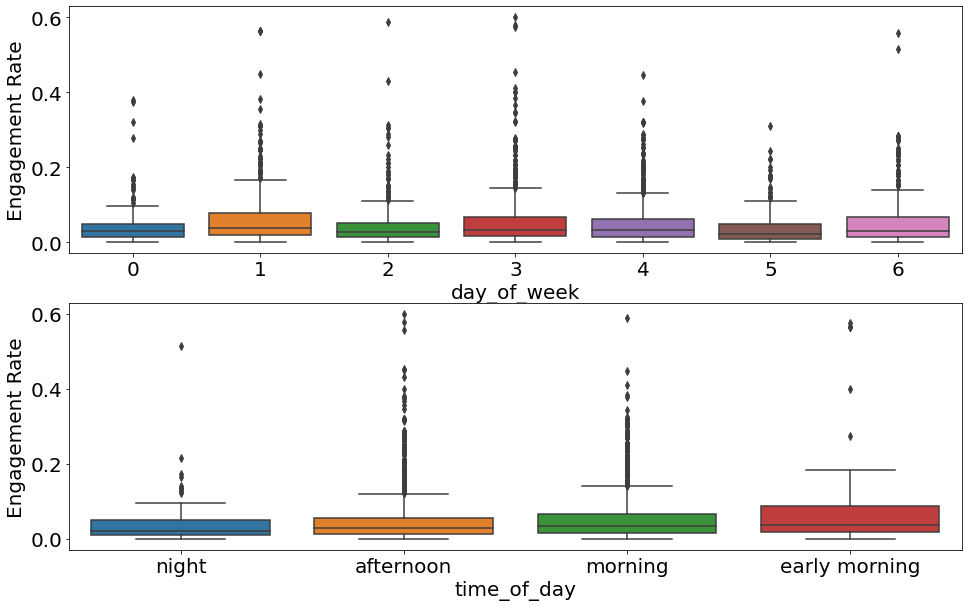

In [298]:
plt.figure(figsize=(16,10))

plt.subplot(211)
sns.boxplot(x="day_of_week", y="Engagement Rate", data=df[df['Engagement Rate'] < 1])

plt.subplot(212)
sns.boxplot(x="time_of_day", y="Engagement Rate", data=df[df['Engagement Rate'] < 1])

plt.show()

In [299]:
# Shapiro-Wilk Test for Normality for day_of_week
from scipy import stats

stat, p = stats.shapiro(df['Engagement Rate'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The sample looks like a normal distribution (fail to reject H0)')
else:
    print('The sample does not look like a normal distribution (reject H0)')

Statistics=0.145, p=0.000
The sample does not look like a normal distribution (reject H0)


As the result of Shapiro-Wilk Test shows, the sample does not look like a normal distribution. Thus, instead of ANOVA, we use Kurskal-Wallis Test, which is a non-parametric testing method, to check whether day of the week and time of the posting actually affect engagement rates.

In [300]:
# perform Kruskal-Wallis Test for day_of_week
dow_kw_stat, dow_kw_p = stats.kruskal(df[df['day_of_week'] == 0]['Engagement Rate'], 
                                      df[df['day_of_week'] == 1]['Engagement Rate'], 
                                      df[df['day_of_week'] == 2]['Engagement Rate'], 
                                      df[df['day_of_week'] == 3]['Engagement Rate'], 
                                      df[df['day_of_week'] == 4]['Engagement Rate'], 
                                      df[df['day_of_week'] == 5]['Engagement Rate'], 
                                      df[df['day_of_week'] == 6]['Engagement Rate'])
alpha = 0.05
if p > alpha:
    print('Since the p-value is',dow_kw_p,', day of the week does not affect engagement rates (fail to reject H0)')
else:
    print('Since the p-value is',dow_kw_p,', day of the week does affect engagement rates (reject H0)')

Since the p-value is 2.573670768271913e-08 , day of the week does affect engagement rates (reject H0)


In [301]:
# perform Kruskal-Wallis Test for time_of_day
tod_kw_stat, tod_kw_p = stats.kruskal(df[df['time_of_day'] == 'early morning']['Engagement Rate'], 
                                      df[df['time_of_day'] == 'morning']['Engagement Rate'], 
                                      df[df['time_of_day'] == 'afternoon']['Engagement Rate'], 
                                      df[df['time_of_day'] == 'night']['Engagement Rate'])
alpha = 0.05
if p > alpha:
    print('Since the p-value is', tod_kw_p,'time of the posting does not affect engagement rates (fail to reject H0)')
else:
    print('Since the p-value is', tod_kw_p,', time of the posting does affect engagement rates (reject H0)')

Since the p-value is 4.716987007882534e-06 , time of the posting does affect engagement rates (reject H0)


In [302]:
df.groupby('time_of_day').median()

,Total Impressions,Total Engagements,Engagement Rate,day_of_week
time_of_day,,,,
afternoon,4585.5,88.5,0.027632,3.0
early morning,4780.0,95.0,0.035714,4.0
morning,4434.0,103.0,0.034884,3.0
night,1908.5,21.5,0.019197,4.0


In [303]:
df.groupby('time_of_day').mean()

,Total Impressions,Total Engagements,Engagement Rate,day_of_week
time_of_day,,,,
afternoon,12874.192661,1176.921254,0.049672,3.110856
early morning,11117.009174,1449.155963,0.164364,3.339450
morning,15742.806452,1252.125000,0.055361,2.887097
night,7902.460526,542.763158,0.044107,3.342105


In [304]:
df.groupby('day_of_week').median()

,Total Impressions,Total Engagements,Engagement Rate
day_of_week,,,
0,2909.5,67.5,0.028385
1,4443.0,105.0,0.038212
2,2842.0,54.0,0.027888
3,5094.0,104.5,0.032988
4,4565.0,107.0,0.030921
5,4329.0,70.0,0.021416
6,6335.5,139.5,0.028919


In [305]:
df.groupby('day_of_week').mean()

,Total Impressions,Total Engagements,Engagement Rate
day_of_week,,,
0,13311.983871,893.973118,0.045173
1,16583.009217,1685.453917,0.065355
2,13371.687646,1045.491841,0.044537
3,15004.232394,1340.042254,0.076420
4,12832.096055,1100.610635,0.050873
5,11693.023166,566.386100,0.037795
6,13618.054745,1443.357664,0.058977


## How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

According to the boxplot, the median value table and the mean value table, Valorant has the best performance in terms of Engagement Rate. While CSGO account has the best performance in total impressions, it has the lowest engagement rate comparing to the Valorant account and DOTA2 account. According to the dataset and the graph in the EDA part, the CSGO account posts less frequently comparing to the other two game accounts, but it still attracts more impressions. Given the number of posts, the number of total impressions and the number of total engagements for CSGO account, I believe there is still a lot of room for improvement and we should focus more on CSGO account to improve the engagement rate.

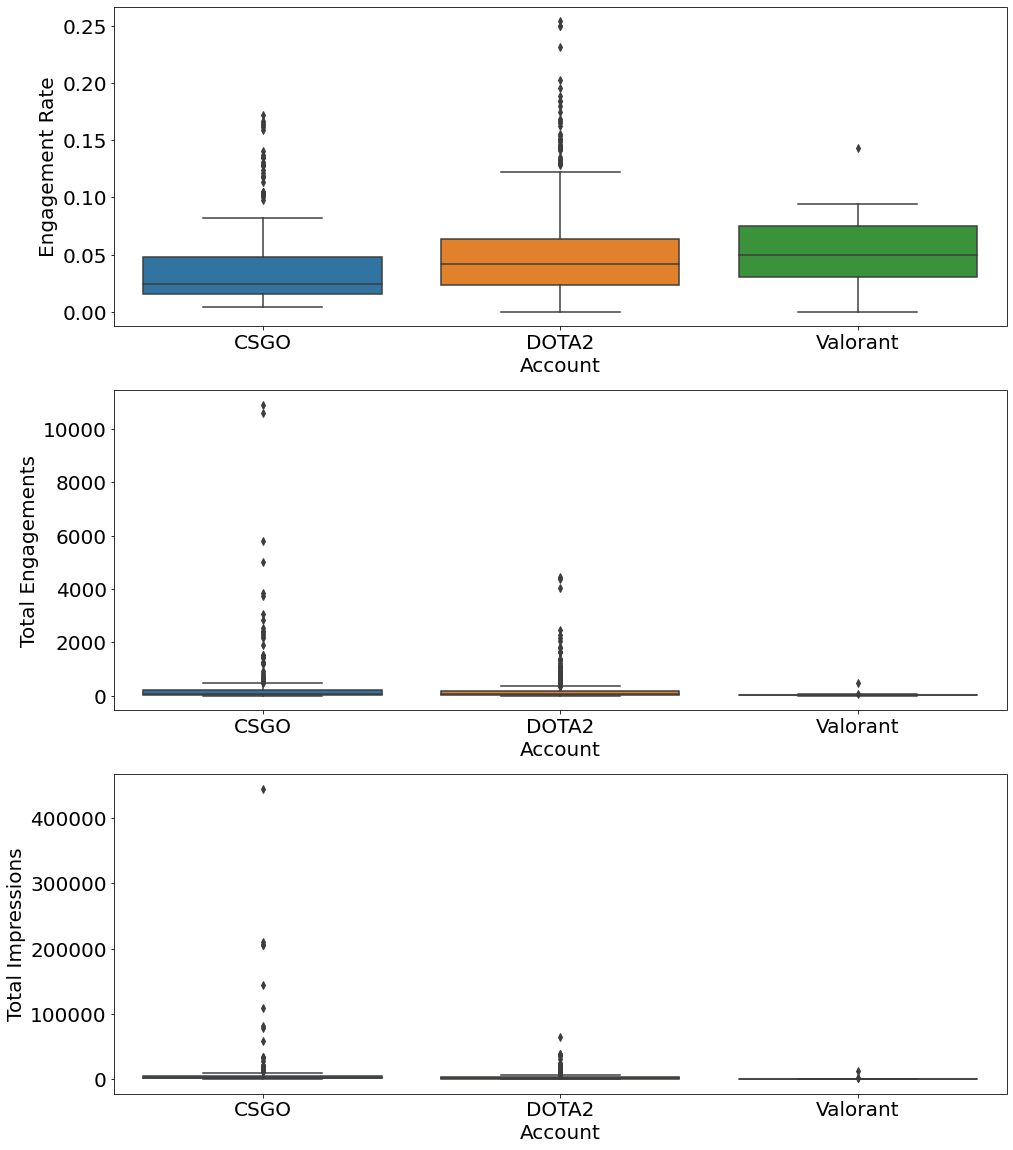

In [306]:
plt.figure(figsize=(16,20))

# Create a figure and axis object
plt.subplot(311)
sns.boxplot(x="Account", y="Engagement Rate", data=df[(df['Account'] != 'General') & (df['Account'] != 'Content Creators') ])

plt.subplot(312)
sns.boxplot(x="Account", y="Total Engagements", data=df[(df['Account'] != 'General') & (df['Account'] != 'Content Creators') ])

plt.subplot(313)
sns.boxplot(x="Account", y="Total Impressions", data=df[(df['Account'] != 'General') & (df['Account'] != 'Content Creators') ])

plt.show()

In [307]:
df[(df['Account'] != 'General') & (df['Account'] != 'Content Creators') ].groupby('Account').mean()

,Total Impressions,Total Engagements,Engagement Rate,day_of_week
Account,,,,
CSGO,11686.454545,466.343434,0.041326,2.742424
DOTA2,2663.790831,177.636103,0.049449,3.177650
Valorant,675.852941,27.382353,0.053380,2.558824


In [308]:
df[(df['Account'] != 'General') & (df['Account'] != 'Content Creators') ].groupby('Account').median()

,Total Impressions,Total Engagements,Engagement Rate,day_of_week
Account,,,,
CSGO,2193.5,61.5,0.024136,3.0
DOTA2,1216.5,45.5,0.042069,3.0
Valorant,243.5,9.0,0.049214,2.5


## What media type performs the best?

The Media Type of Mixed has the best performance since it has the highest mean and median value for Total Impressions, Total Engagements and Engagement Rate. Also, according to the boxplots, it has the most stable Total Impressions, Total Engagements and Engagement Rate.

While Album seems to have a great performance in terms of Total Impressions, Total Engagements, and Engagement Rate, the dataset only has one record of it, and it is hard to decide whether it will have the same performance for the next release from the perspective of statistics.

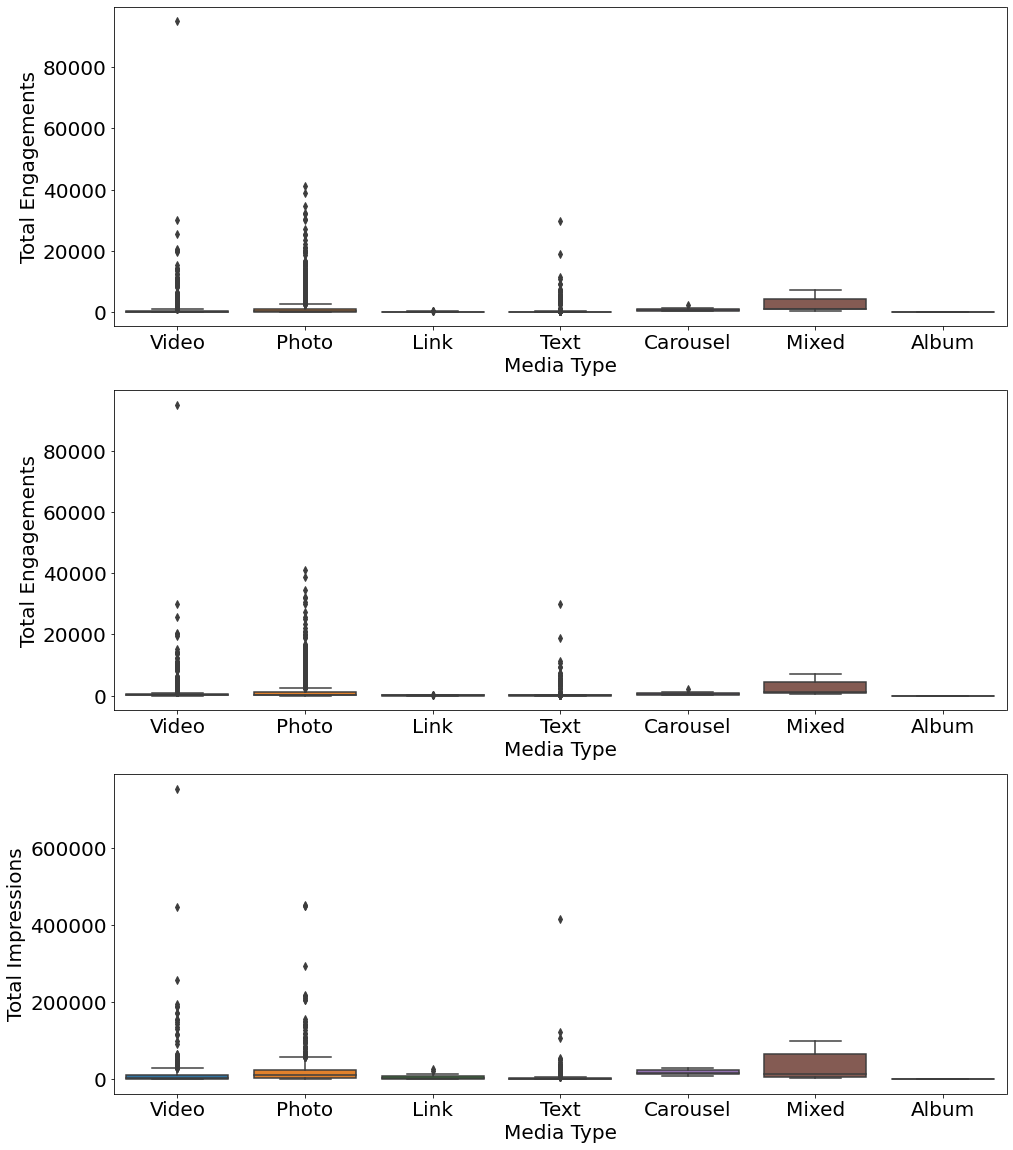

In [309]:
plt.figure(figsize=(16,20))

# Create a figure and axis object
plt.subplot(311)
sns.boxplot(x="Media Type", y="Total Engagements", data=df)

plt.subplot(312)
sns.boxplot(x="Media Type", y="Total Engagements", data=df)

plt.subplot(313)
sns.boxplot(x="Media Type", y="Total Impressions", data=df)

plt.show()

In [310]:
df.groupby('Media Type').median()

,Total Impressions,Total Engagements,Engagement Rate,day_of_week
Media Type,,,,
Album,20.0,8.0,0.400000,3.0
Carousel,17411.0,528.0,0.030326,3.0
Link,3012.0,30.0,0.010877,2.0
Mixed,13178.0,1040.0,0.072478,4.0
Photo,10785.0,190.0,0.027675,3.0
Text,992.0,24.0,0.029447,3.0
Video,3355.0,87.0,0.034869,3.0


In [311]:
df.groupby('Media Type').mean()

,Total Impressions,Total Engagements,Engagement Rate,day_of_week
Media Type,,,,
Album,20.000000,8.000000,0.400000,3.000000
Carousel,17854.333333,726.777778,0.037843,2.777778
Link,5669.878049,55.048780,0.037500,2.414634
Mixed,36996.800000,2732.800000,0.107704,3.200000
Photo,19222.599356,1740.163315,0.066189,3.251810
Text,5668.253650,449.474453,0.040839,3.003650
Video,11958.028217,970.034989,0.053518,2.749436


## What is our best performing campaign?

While it is not easy to derive any conclusion from the boxplot, community engagement seems to have the best overall performance as it generally has the highest mean and median for Total Impressions, Total Engagements, and Engagement Rate.

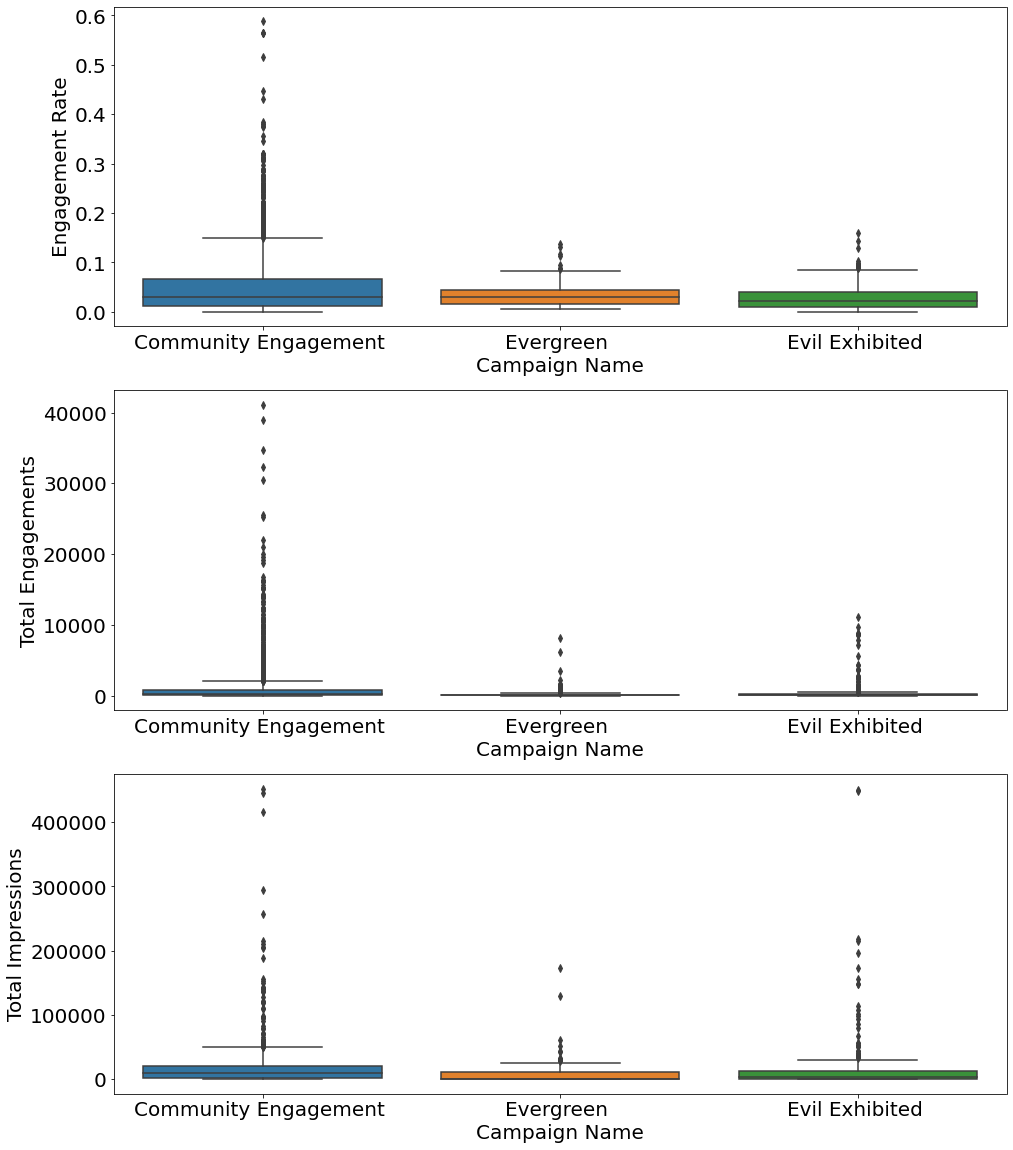

In [312]:
plt.figure(figsize=(16,20))

# Create a figure and axis object
plt.subplot(311)
sns.boxplot(x="Campaign Name", y="Engagement Rate", data=df[df['Campaign Name'].notna()])

plt.subplot(312)
sns.boxplot(x="Campaign Name", y="Total Engagements", data=df[df['Campaign Name'].notna()])

plt.subplot(313)
sns.boxplot(x="Campaign Name", y="Total Impressions", data=df[df['Campaign Name'].notna()])

plt.show()

In [313]:
df[df['Campaign Name'].notna()].groupby('Campaign Name').mean()

,Total Impressions,Total Engagements,Engagement Rate,day_of_week
Campaign Name,,,,
Community Engagement,17261.606962,1482.789703,0.057653,3.077592
Evergreen,8252.975155,267.869565,0.035105,2.459627
Evil Exhibited,14612.201018,471.513995,0.028661,3.030534


In [314]:
df[df['Campaign Name'].notna()].groupby('Campaign Name').median()

,Total Impressions,Total Engagements,Engagement Rate,day_of_week
Campaign Name,,,,
Community Engagement,9926.0,176.0,0.030000,3.0
Evergreen,1180.0,47.0,0.030916,3.0
Evil Exhibited,3194.0,43.0,0.021999,3.0


## Define out a posting strategy for our social channels based on your discoveries.

According to the previous discorveries, the mean value table and the median value table below, to attract more impressions and engagements, I would recommend to use general account and post more on Facebook page on early mornings with a campaign of community engagement and a media type of mixed.

In [315]:
df.groupby(['Account', 'Account Type', 'Campaign Name', 'Media Type']).median()

Total Impressions  \
Account          Account Type     Campaign Name         Media Type                      
CSGO             TWITTER          Community Engagement  Link                   3949.0   
                                                        Photo                  2289.0   
                                                        Text                    807.0   
                                                        Video                  3298.5   
Content Creators YOUTUBE          Community Engagement  Video                    38.0   
                                  Evergreen             Video                    12.0   
DOTA2            TWITTER          Community Engagement  Mixed                  2028.0   
                                                        Photo                  3215.5   
                                                        Text                   1428.0   
                                                        Video                  3404.5   
                                  Evil Exhibited        Link                    398.0   
                                                        Photo                  1027.0   
                                                        Text                    891.0   
                                                        Video                  1268.5   
General          FBPAGE           Community Engagement  Photo                 29051.0   
                                                        Text                  31031.0   
                                                        Video                 20187.0   
                                  Evergreen             Video                 61643.0   
                                  Evil Exhibited        Link                   6416.0   
                                                        Photo                 19364.0   
                                                        Video                  9273.0   
                 INSTAGRAM        Community Engagement  Carousel              18645.0   
                                                        Photo                  5789.0   
                                                        Video                  5015.0   
                                  Evergreen             Video                 11111.5   
                                  Evil Exhibited        Carousel              10026.0   
                                                        Photo                  4467.5   
                                                        Video                  6584.0   
                 LINKEDIN_COMPANY Community Engagement  Link                   1946.5   
                                                        Photo                  1513.0   
                                                        Text                   2023.5   
                                                        Video                  1457.0   
                                  Evil Exhibited        Link                   3859.0   
                 TIKTOK_BUSINESS  Community Engagement  Video                   381.0   
                                  Evergreen             Video                   870.0   
                                  Evil Exhibited        Video                   616.0   
                 TWITTER          Community Engagement  Link                   8540.0   
                                                        Mixed                 13178.0   
                                                        Photo                 16867.0   
                                                        Text                   1648.0   
                                                        Video                 11125.0   
                                  Evergreen             Video                 52350.0   
                                  Evil Exhibited        Link                  12035.5   
                                                        Mixed  

In [316]:
df.groupby(['Account', 'Account Type', 'Campaign Name', 'Media Type']).mean()

Total Impressions  \
Account          Account Type     Campaign Name         Media Type                      
CSGO             TWITTER          Community Engagement  Link              3949.000000   
                                                        Photo            11745.872000   
                                                        Text              1529.380952   
                                                        Video            21612.133333   
Content Creators YOUTUBE          Community Engagement  Video              399.400000   
                                  Evergreen             Video               12.000000   
DOTA2            TWITTER          Community Engagement  Mixed             2028.000000   
                                                        Photo             5074.796610   
                                                        Text              1768.212121   
                                                        Video             5687.000000   
                                  Evil Exhibited        Link               398.000000   
                                                        Photo             1264.680000   
                                                        Text              1043.758621   
                                                        Video             2323.000000   
General          FBPAGE           Community Engagement  Photo            32122.218905   
                                                        Text             36682.000000   
                                                        Video            32428.415094   
                                  Evergreen             Video            61643.000000   
                                  Evil Exhibited        Link              6416.000000   
                                                        Photo            18375.416667   
                                                        Video             8939.333333   
                 INSTAGRAM        Community Engagement  Carousel         18832.875000   
                                                        Photo            10221.184783   
                                                        Video             7606.661017   
                                  Evergreen             Video            17135.000000   
                                  Evil Exhibited        Carousel         10026.000000   
                                                        Photo             6179.833333   
                                                        Video             6708.073171   
                 LINKEDIN_COMPANY Community Engagement  Link              1946.500000   
                                                        Photo             1685.166667   
                                                        Text              2023.500000   
                                                        Video             1457.000000   
                                  Evil Exhibited        Link              3859.000000   
                 TIKTOK_BUSINESS  Community Engagement  Video              802.076923   
                                  Evergreen             Video             1598.285714   
                                  Evil Exhibited        Video             9976.045455   
                 TWITTER          Community Engagement  Link              8123.947368   
                                                        Mixed            13178.000000   
                                                        Photo            26302.554717   
                                                        Text             10350.808696   
                                                        Video            14381.453901   
                                  Evergreen             Video            52350.000000   
                                  Evil Exhibited        Link             12035.500000   
                                                        Mixed  

## What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?

Without specific dataset, I would recommend to first analyze the similarity of the two platforms and see if there is a significant overlap between the audience on the current platform and the potential audience on the target platform. Then I would recoomend to find and analyze engagement data of accounts of similar game type on the target platform to estimate the potential engagement performance of our account once we expand our presence to the new platform. Also, try to start with the content strategies that have good performances already on the target platform or similar platform before testing new content strategies. 

In [317]:
df.groupby(['Account','Account Type']).mean()

Total Impressions  Total Engagements  \
Account          Account Type                                             
CSGO             TWITTER                11686.454545         466.343434   
Content Creators YOUTUBE                 1291.028571          39.628571   
DOTA2            TWITTER                 2584.142857         172.278499   
                 YOUTUBE                13703.000000         920.200000   
General          FBPAGE                 33579.691415        5968.835267   
                 INSTAGRAM               9845.892562         231.644628   
                 LINKEDIN_COMPANY        1945.500000          38.590909   
                 TIKTOK_BUSINESS         3072.848214         168.437500   
                 TWITTER                20151.658377         514.180628   
                 YOUTUBE                 1338.460526          44.855263   
Valorant         YOUTUBE                  675.852941          27.382353   

                                   Engagement Rate  day_of_week  
Account          Account Type                                    
CSGO             TWITTER                  0.041326     2.742424  
Content Creators YOUTUBE                  0.061717     2.971429  
DOTA2            TWITTER                  0.049444     3.186147  
                 YOUTUBE                  0.050116     2.000000  
General          FBPAGE                   0.172779     3.234339  
                 INSTAGRAM                0.010801     3.049587  
                 LINKEDIN_COMPANY         0.017950     2.363636  
                 TIKTOK_BUSINESS          0.053642     2.401786  
                 TWITTER                  0.027409     3.022251  
                 YOUTUBE                  0.032657     2.421053  
Valorant         YOUTUBE                  0.053380     2.558824

In [318]:
df.groupby(['Account','Account Type']).median()

Total Impressions  Total Engagements  \
Account          Account Type                                             
CSGO             TWITTER                      2193.5               61.5   
Content Creators YOUTUBE                      1372.0               36.0   
DOTA2            TWITTER                      1220.0               45.0   
                 YOUTUBE                       852.0               65.0   
General          FBPAGE                      28117.0             3550.0   
                 INSTAGRAM                    6162.0                0.0   
                 LINKEDIN_COMPANY             1648.0               28.5   
                 TIKTOK_BUSINESS               705.5               40.5   
                 TWITTER                     12792.0              146.5   
                 YOUTUBE                       757.5               25.0   
Valorant         YOUTUBE                       243.5                9.0   

                                   Engagement Rate  day_of_week  
Account          Account Type                                    
CSGO             TWITTER                  0.024136          3.0  
Content Creators YOUTUBE                  0.036885          4.0  
DOTA2            TWITTER                  0.041812          3.0  
                 YOUTUBE                  0.053623          1.0  
General          FBPAGE                   0.135138          3.0  
                 INSTAGRAM                0.000000          3.0  
                 LINKEDIN_COMPANY         0.016899          2.0  
                 TIKTOK_BUSINESS          0.045572          2.0  
                 TWITTER                  0.019800          3.0  
                 YOUTUBE                  0.032677          2.0  
Valorant         YOUTUBE                  0.049214          2.5